---

# 2.6 Zeros of polynomials and Horner's method 

---

A polynomial of degree $n$ has the form
$$P(x)=P_n(x)=a_nx^n+a_{n-1}x^{n-1}+\cdots +a_1x+a_0$$
where the $a_i$’s, called the coefficients of $P_n$ and $a_n\neq 0$. 

The problem is as follows: Find $x$ such that

$$P(x) = 0.$$

> ### Fundamental Theorem of Algebra
> If $P(x)$ is a polynomial of degree $n \ge 1$ with real or complex coefficients, 
>then $P(x) = 0$ has at least one ( possibly complex) root.

## Example: 
Determine all the zeros of the polynomial $P(x) = x^3 - 5x^2 + 17x - 13$.

Note that $P(1)=0.$

In [1]:
P(x) = x^3 - 5x^2 + 17x - 13

P (generic function with 1 method)

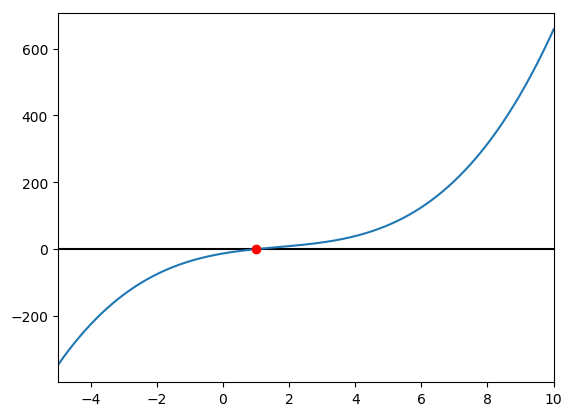

In [3]:
using PyPlot
x = range(-5, stop=10, length=1000)
plot(x, P.(x))
hlines(0, -5, 10)
plot(1, 0, "ro")
xlim(-5, 10);

## Horner's Method
To use Newton’s method, we need to evaluate $P(x)$ and $P^\prime(x)$ at specified values. 

Computational efficiency requires that the evaluation of polynomials be done in the **nested** manner discussed before. Horner’s (Ruffini) method incorporates this nesting technique, and, as a consequence, requires only $n$ multiplications and $n$ additions to evaluate an arbitrary $n$th-degree polynomial.

>## Theorem (Horner’s Method)
>Let $$P(x)=a_nx^n+a_{n-1}x^{n-1}+\cdots +a_1x+a_0.$$
Define $b_n = a_n$ and
$$ b_k =a_k +b_{k+1}x_0,\qquad k=n−1,n−2,\ldots,1,0.$$
Then $b_0 = P(x_0)$. Moreover, if
$$Q(x)=b_nx^{n−1} +b_{n−1}x^{n−2} +\cdots+b_2x+b_1,$$
then $$P(x)=(x-x_0)Q(x)+b_0.$$

In [4]:
using Polynomials

In [5]:
? Polynomials

search: Polynomials



No documentation found.

No docstring found for module `Polynomials`.


In [6]:
Poly([-13,17,-5,1])

Poly(-13 + 17*x - 5*x^2 + x^3)

In [7]:
roots(Poly([1, -5, 17, -13]))

3-element Array{Complex{Float64},1}:
 0.15384615384615374 - 0.23076923076923064im
 0.15384615384615374 + 0.23076923076923064im
  1.0000000000000007 + 0.0im                

In [8]:
p = Poly([1, -5, 17, -13])
polyval(p, -0.1)

1.683

In [9]:
function horner(coefs, x)
    s = copy(coefs[end])
    for k in length(coefs)-1:-1:1
        s = copy(coefs[k]) + x * s  # b_k = a_k + x_0*b_{k+1}
    end
    return s
end

horner (generic function with 1 method)

In [10]:
Poly([1, -5, 17, -13])

Poly(1 - 5*x + 17*x^2 - 13*x^3)

In [11]:
horner([1, -5, 17, -13], -0.1)

1.683

In [20]:
# We are beating JULIA!!!
coefs=rand(1000001)
p = Poly(coefs)
x0=-0.2345
@time polyval(p, x0)
@time p(x0)
@time horner(coefs, x0)

  0.002947 seconds (5 allocations: 176 bytes)
  0.002949 seconds (5 allocations: 176 bytes)
  0.002935 seconds (5 allocations: 176 bytes)


0.7842767176684162

## Example: 
Use Horner's method to evaluate
$$P(x) = 2x^4 − 3x^2 + 3x − 4 \qquad \mbox{at}\quad x_0 = −2.$$

An additional advantage of using the Horner  procedure is that, since
$$P(x) = (x − x_0)Q(x) + b_0,$$ 

$$P^\prime(x)=Q(x)+(x−x )Q^\prime(x)\qquad \mbox{and} \qquad
P^\prime(x_0)=Q(x_0).$$

When the Newton's method is being used to find an approximate zero of a polynomial, $P(x)$ and $P^\prime(x)$ can be evaluated.

In [21]:
function hornerVect(coefs, x)
    coefsnew = copy(coefs)
    for k in length(coefs)-1:-1:1
        coefsnew[k] = copy(coefs[k]) + x * coefsnew[k+1]  # b_k = a_k + x_0*b_{k+1}
    end
    return coefsnew
end

hornerVect (generic function with 1 method)

In [22]:
p = Poly([-4,3, -3,0, 2])
b=hornerVect([-4,3, -3,0, 2],-2)

5-element Array{Int64,1}:
 10
 -7
  5
 -4
  2

In [23]:
b[1]

10

In [24]:
p(-2)

10

In [25]:
q = Poly(b[2:length(b)])

Poly(-7 + 5*x - 4*x^2 + 2*x^3)

In [26]:
d = horner(b[2:length(b)],-2)

-49

In [27]:
q(-2)

-49

In [29]:
using PyPlot
using Printf

function plotnewtonH(p,q, x0, a, b; tol=1e-6, maxiter=10)    
    xspan = range(a, stop=b, length=1000)
    plot(xspan, p.(xspan), "b")
    hlines(0, a, b)
    xlim(a, b)    
    k = 0
    x = x0
    px = p(x)
    #q=polyder(p)
    #qx = q(x)
    xold, xnew = x, Inf
    @printf "%4s %22s %22s\n" "k" "x" "p(x)"
    while abs(xnew - xold) > tol*(1 + abs(xold)) && k < maxiter
        k += 1
        xnew = x - px/q(x)
        vlines(x, 0, px, linestyles=":")
        plot([xnew, x], [0, px], "r")
        plot(x, px, "bo")
        xold = x
        x = xnew
        px = p(x)
        #qx = q(x)
        @printf "%4d %22.15e %22.15e\n" k x px
    end  
    return x  
end

plotnewtonH (generic function with 1 method)

In [30]:
p=Poly([-4,3, -3,0, 2])

Poly(-4 + 3*x - 3*x^2 + 2*x^4)

In [31]:
q=polyder(p)

Poly(3 - 6*x + 8*x^3)

   k                      x                   p(x)


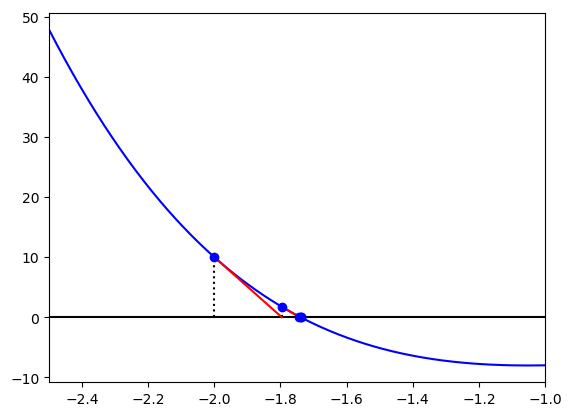

   1 -1.795918367346939e+00  1.741690649859379e+00
   2 -1.742432916750542e+00  9.995592022432565e-02
   3 -1.738970235336167e+00  4.002870896355759e-04
   4 -1.738956256679049e+00  6.504574656673867e-09
   5 -1.738956256451892e+00  8.881784197001252e-16


-1.738956256451892

In [32]:
x = plotnewtonH(p,q, -2.0, -2.5, -1)

In [33]:
roots(p)

4-element Array{Complex{Float64},1}:
 -1.7389562564518912 + 0.0im               
 0.24203718580880035 - 0.9262454872675303im
 0.24203718580880035 + 0.9262454872675303im
  1.2548818848342933 + 0.0im               

In [34]:
using Polynomials
using Printf
function newtonH(pcoefs, x0; tol=1e-6, maxiter=10)   
    k=0
    @printf "%4s %22s %22s  %22s\n" "k" "x" "p(x)" "q(x)" 
    x = x0
    p=Poly(pcoefs)
    q=polyder(p)
    px = p(x)
    qx = q(x)   
    xold, xnew = x, Inf
    @printf "%4d %22.15e %22.15e\n" k x px 
    while abs(xnew - xold) > tol*(1 + abs(xold)) && k < maxiter
        k += 1
        xnew = x - px/qx
        xold = x
        x = xnew
        px = p(x)
        qx = q(x) 
        @printf "%4d %22.15e %22.15e\n" k x px 
    end  
    return x  
end

newtonH (generic function with 1 method)

In [35]:
a=[-10,0, 1]
newtonH(a, 20)

   k                      x                   p(x)                    q(x)
   0  2.000000000000000e+01  3.900000000000000e+02
   1  1.025000000000000e+01  9.506250000000000e+01
   2  5.612804878048781e+00  2.150357859904819e+01
   3  3.697222645433951e+00  3.669455289909621e+00
   4  3.200977809537825e+00  2.462589371535735e-01
   5  3.162511604551991e+00  1.479648926011379e-03
   6  3.162277668821308e+00  5.472592690125566e-08
   7  3.162277660168380e+00  1.776356839400250e-15


3.1622776601683795

## An application: Minimizing a function in one variable

We can use the root-finding methods described above to find the **minimum** or **maximum** value of a function $\phi \in C^2[a,b]$.

Recall that $x^* \in (a,b)$ is a **critical point** of $\phi$ if 

$$\phi'(x^*) = 0.$$

We can find $x^*$ by applying Newton's method to this nonlinear equation to obtain:

$$x_{k+1} = x_k - \frac{\phi'(x_k)}{\phi''(x_k)}.$$

## Another interpretation for Newton's method

We can also obtain this by considering the **second-order (quadratic) approximation** of $\phi$ around the point $x_k$:

$$\phi(x) \approx \phi(x_k) + \phi'(x_k)(x-x_k) + \frac{\phi''(x_k)}{2}(x-x_k)^2, \quad \text{for all $x \approx x_k$}.$$

If $x_k$ is close to $x^*$, we expect the minimum/maximum of $\phi$ to be near the minimum/maximum of the **quadratic approximation** of $\phi$:

$$q(x) = \phi(x_k) + \phi'(x_k)(x-x_k) + \frac{\phi''(x_k)}{2}(x-x_k)^2.$$

Thus we should choose $x_{k+1}$ to be the critical point of $q$, so we want to find $x_{k+1}$ such that $q'(x_{k+1}) = 0$. Note that

$$q'(x) = \phi'(x_k) + \phi''(x_k)(x-x_k).$$

Thus $q'(x_{k+1}) = 0$ gives us

$$x_{k+1} = x_k - \frac{\phi'(x_k)}{\phi''(x_k)}.$$

---

## Example

Let's find the minimum value of 

$$\phi(x) = 10\cosh(x/4) - x$$

by applying Newton's method.

In [36]:
using PyPlot

function plotnewton(f, fp, x0, a, b; tol=1e-6, maxiter=10)
    
    xspan = range(a, stop=b, length=1000)
    plot(xspan, f.(xspan), "b")
    hlines(0, a, b)
    xlim(a, b)
    
    k = 0
    x = x0
    fx = f(x)
    xold, xnew = x, Inf
    @printf "%4s %22s %22s\n" "k" "x" "f(x)"
    while abs(xnew - xold) > tol*(1 + abs(xold)) && k < maxiter
        k += 1
        xnew = x - fx/fp(x)
        
        # Plotting stuff
        vlines(x, 0, fx, linestyles=":")
        plot([xnew, x], [0, fx], "r")
        plot(x, fx, "bo")
        
        xold = x
        x = xnew
        fx = f(x)
        @printf "%4d %22.15e %22.15e\n" k x fx
    end
    
    return x
    
end

plotnewton (generic function with 1 method)

In [37]:
ϕ(x) = 10cosh(x/4) - x

ϕ (generic function with 1 method)

In [38]:
ϕp(x) = 2.5sinh(x/4) - 1

ϕp (generic function with 1 method)

In [39]:
ϕpp(x) = 0.625cosh(x/4)

ϕpp (generic function with 1 method)

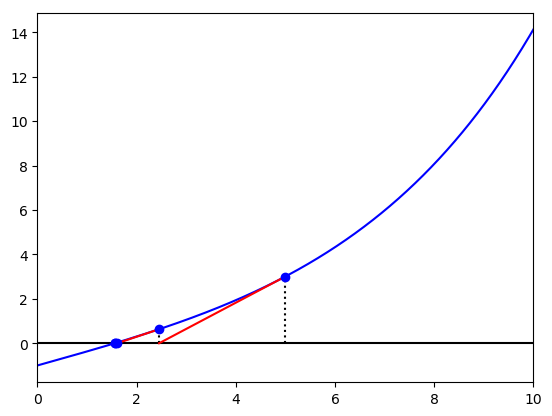

   k                      x                   f(x)
   1  2.454132846259612e+00  6.318888130288225e-01
   2  1.607515395183571e+00  3.196055878741744e-02
   3  1.560247213739166e+00  7.130979857405961e-05
   4  1.560141279603856e+00  3.507054646689767e-10
   5  1.560141279082861e+00 -1.110223024625157e-16


1.560141279082861

In [40]:
x0, a, b = 5., 0., 10.

x = plotnewton(ϕp, ϕpp, x0, a, b)

In [41]:
ϕpp(x)

0.673145600891813

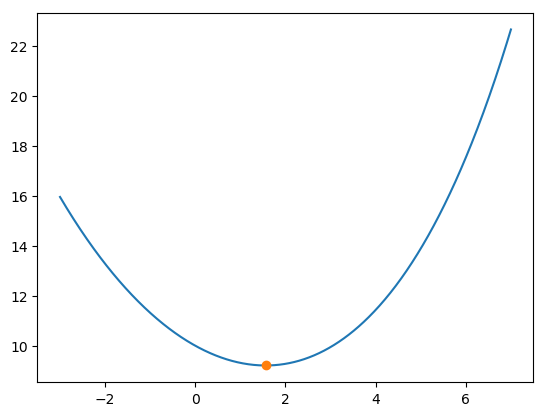

In [32]:
xspan = range(-3, stop=7, length=1000)

plot(xspan, ϕ.(xspan))
plot(x, ϕ(x), "o");

Thus 

$$x^* = 1.560141279082861\ldots.$$ 

Note that $\phi'(x^*) = 0$, as required. Since $\phi''(x^*) > 0$, we know that 

$$\phi(x^*) = 9.210188335186146\ldots$$ 

is a **local minimum value** of $\phi$.

In fact, since $\phi''(x) > 0$ for all $x$, we know that $\phi(x^*)$ is the **global minimum value** of $\phi$.

---